In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
values_missing = df.isna().sum()

missing_percentage = (df.isna().sum() / len(df)) * 100

missing = pd.DataFrame({'Missing Values': values_missing, 'Percentage': missing_percentage})
print(missing)

             Missing Values  Percentage
PassengerId               0    0.000000
Survived                  0    0.000000
Pclass                    0    0.000000
Name                      0    0.000000
Sex                       0    0.000000
Age                     177   19.865320
SibSp                     0    0.000000
Parch                     0    0.000000
Ticket                    0    0.000000
Fare                      0    0.000000
Cabin                   687   77.104377
Embarked                  2    0.224467


In [7]:
df=df.drop(columns='Cabin')

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
med_age = df['Age'].median()

df['Age'] = df['Age'].fillna(med_age)

In [10]:
values_missing = df.isna().sum()

missing_percentage = (df.isna().sum() / len(df)) * 100

missing = pd.DataFrame({'Missing Values': values_missing, 'Percentage': missing_percentage})
print(missing)

             Missing Values  Percentage
PassengerId               0    0.000000
Survived                  0    0.000000
Pclass                    0    0.000000
Name                      0    0.000000
Sex                       0    0.000000
Age                       0    0.000000
SibSp                     0    0.000000
Parch                     0    0.000000
Ticket                    0    0.000000
Fare                      0    0.000000
Embarked                  2    0.224467


In [12]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [13]:
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])

In [14]:
df = df.dropna(subset=['Embarked'])

In [15]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])

C:\Users\prane\AppData\Local\Temp\ipykernel_15468\3916886174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = le.fit_transform(df['Embarked'])


In [19]:
df.loc[:, 'Embarked'] = le.fit_transform(df['Embarked'])

In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

In [25]:
df.drop(columns=['Ticket'], inplace=True)
df.dtypes

C:\Users\prane\AppData\Local\Temp\ipykernel_15468\633891695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Ticket'], inplace=True)


PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

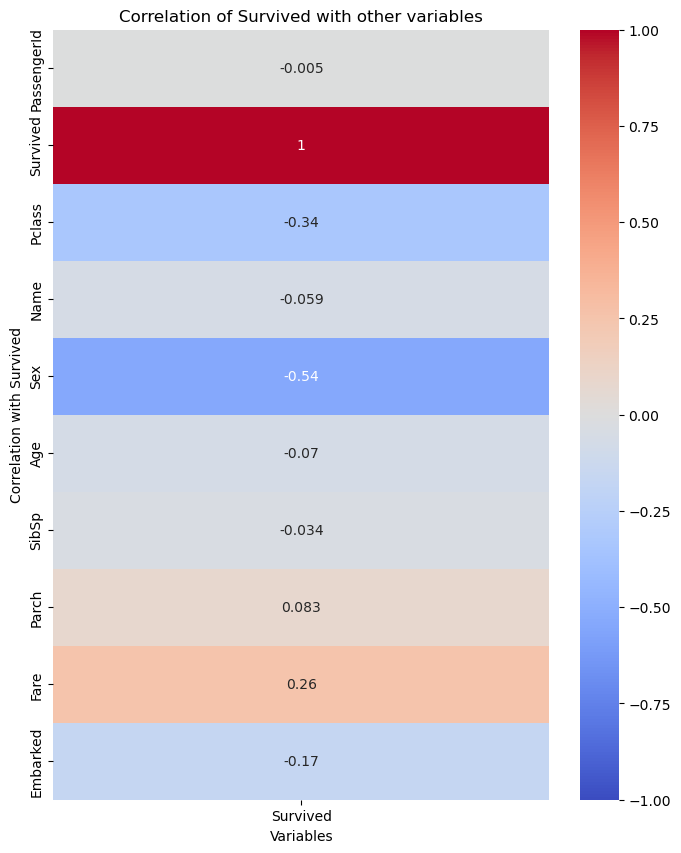

In [26]:
correlation_matrix = df.corr()
survival_correlation = correlation_matrix[['Survived']]
plt.figure(figsize=(8, 10))
sns.heatmap(survival_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation of Survived with other variables')
plt.xlabel('Variables')
plt.ylabel('Correlation with Survived')
plt.show()

In [27]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_cols)


Categorical columns:
Index([], dtype='object')


In [28]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [29]:
numerical_columns = ['PassengerId','Pclass' ,'Sex','Age','SibSp','Parch' ,'Fare','Embarked']
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
numerical_outliers = ((df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR)))
numerical_outliers_count = numerical_outliers.sum()

print("Number of outliers for each numerical column:")
print(numerical_outliers_count)

Number of outliers for each numerical column:
PassengerId      0
Pclass           0
Sex              0
Age             65
SibSp           46
Parch          213
Fare           114
Embarked         0
dtype: int64


In [30]:
outlier_rows = numerical_outliers.any(axis=1)

df = df[~outlier_rows]
df.shape

(577, 10)

In [31]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns)


print(normalized_df.head())

   PassengerId  Survived  Pclass      Name  Sex       Age  SibSp  Parch  \
0     0.000000       0.0     1.0  0.121348  1.0  0.346939    0.5    0.0   
1     0.002247       1.0     1.0  0.396629  0.0  0.428571    0.0    0.0   
2     0.003371       1.0     0.0  0.305618  0.0  0.612245    0.5    0.0   
3     0.004494       0.0     1.0  0.016854  1.0  0.612245    0.0    0.0   
4     0.005618       0.0     1.0  0.622472  1.0  0.469388    0.0    0.0   

       Fare  Embarked  
0  0.118512       1.0  
1  0.129546       1.0  
2  0.868002       1.0  
3  0.131590       1.0  
4  0.138264       0.5  


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = normalized_df.drop('Survived', axis=1)
y = normalized_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8275862068965517
Confusion Matrix:
 [[77 10]
 [10 19]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        87
         1.0       0.66      0.66      0.66        29

    accuracy                           0.83       116
   macro avg       0.77      0.77      0.77       116
weighted avg       0.83      0.83      0.83       116

